In [1]:
#checking direcctory 
import os
os.getcwd()

'C:\\Users\\Anshul'

In [3]:
# Changing to datasets directory
os.chdir("C:\\Users\\Anshul\\OneDrive\\Desktop\\datasets")
os.getcwd()

'C:\\Users\\Anshul\\OneDrive\\Desktop\\datasets'

In [4]:
# Setting a path for datasets
path = './MYCT_100/'

In [5]:
# Get the list of all directories and sort them
dir_list = next(os.walk(path))[1]
dir_list.sort()

#just checking everything is ok or not
print(dir_list[:10])

['0000', '0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009']


In [6]:
# Genuine signatures and Forged signatures stored in the list "all_groups"
# for each user first 25 are forged and remaining 25 are genuine
all_groups = []
for directory in dir_list:
    images_cor = os.listdir(path+directory)
    images_cor.sort()
    images_cor = [path+directory+'/'+x for x in images_cor]
    all_groups.append(images_cor)

In [9]:
#routine check everything is ok or not
print(all_groups[4])

['./MYCT_100/0004/0004f00.dat', './MYCT_100/0004/0004f01.dat', './MYCT_100/0004/0004f02.dat', './MYCT_100/0004/0004f03.dat', './MYCT_100/0004/0004f04.dat', './MYCT_100/0004/0004f05.dat', './MYCT_100/0004/0004f06.dat', './MYCT_100/0004/0004f07.dat', './MYCT_100/0004/0004f08.dat', './MYCT_100/0004/0004f09.dat', './MYCT_100/0004/0004f10.dat', './MYCT_100/0004/0004f11.dat', './MYCT_100/0004/0004f12.dat', './MYCT_100/0004/0004f13.dat', './MYCT_100/0004/0004f14.dat', './MYCT_100/0004/0004f15.dat', './MYCT_100/0004/0004f16.dat', './MYCT_100/0004/0004f17.dat', './MYCT_100/0004/0004f18.dat', './MYCT_100/0004/0004f19.dat', './MYCT_100/0004/0004f20.dat', './MYCT_100/0004/0004f21.dat', './MYCT_100/0004/0004f22.dat', './MYCT_100/0004/0004f23.dat', './MYCT_100/0004/0004f24.dat', './MYCT_100/0004/0004v00.dat', './MYCT_100/0004/0004v01.dat', './MYCT_100/0004/0004v02.dat', './MYCT_100/0004/0004v03.dat', './MYCT_100/0004/0004v04.dat', './MYCT_100/0004/0004v05.dat', './MYCT_100/0004/0004v06.dat', './MYCT

In [10]:
# Quick check to confirm we have data of all the 100 individuals
len(all_groups)

100

In [11]:
# Quick check to confirm that there are 50 Genuine and forged signatures for each individual
print([len(x) for x in all_groups])

[50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 40, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]


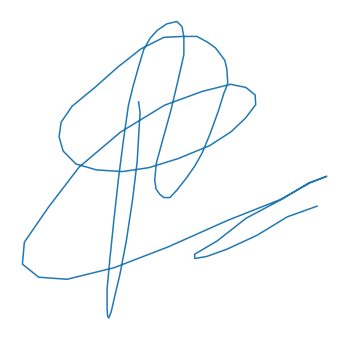

In [16]:
# Now the main prblem is that our data is in the form of coordinates
# first two cordinates are x and y 
# other values are not useful for us as we are doing offline verification

import matplotlib.pyplot as plt
%matplotlib inline

f = open(all_groups[0][0],'r')
x,y = [],[]
for i in f:
    lst = i.split(",")
    x.append(int(lst[0]))
    y.append(int(lst[1]))
    
f, ax = plt.subplots(1,1, figsize=(6,6))
ax.axis('off')
plt.plot(x, y)
f.savefig('sss.tif')

In [75]:
# Now with the help of matplotlib we will save the image and axis will be off for complete data

#changing directory 
os.chdir("C:\\Users\\Anshul\\OneDrive\\Desktop\\datasets")
path = './MYCT_100_plot/'

# New images will have extension .png
extension = 'png'

# Intializing vars
user_n = '0000'
u = 0

for user in all_groups:
    os.mkdir(".\\MYCT_100_plot\\"+user_n)
    
    #Taking all coordinates of images convert to plot and save to user-vise directory
    for image_cor in user:
        
        f = open(image_cor,'r')
        x,y = [],[]
        for i in f:
            lst = i.split(",")
            x.append(int(lst[0]))
            y.append(int(lst[1]))
        f, ax = plt.subplots(1,1, figsize=(6,6))
        ax.axis('off')
        plt.plot(x, y)
        
        f.savefig(path+user_n+'/'+image_cor.split("/")[-1][:-3]+extension)
        plt.close()
    
    u+=1
    user_n = '000' + str(u)
    
    while len(user_n) != 4:
        user_n = user_n[1:]

In [76]:
# Get the list of all directories and sort them
dir_list = next(os.walk(path))[1]
dir_list.sort()

In [77]:
# For each person segregate the genuine signatures from the forged signatures
# Genuine signatures are stored in the list "orig_groups"
# Forged signatures are stored in the list "forged_groups"
orig_groups, forg_groups = [], []
for directory in dir_list:
    images = os.listdir(path+directory)
    images.sort()
    images = [path+directory+'/'+x for x in images]
    forg_groups.append(images[:25]) # First 25 signatures in each folder are forrged
    orig_groups.append(images[25:]) # Next 25 signatures are genuine

In [78]:
# Quick check to confirm we have data of all the 100 individuals
len(orig_groups), len(forg_groups)


(100, 100)

In [79]:
orig_lengths = [len(x) for x in orig_groups]
forg_lengths = [len(x) for x in forg_groups]


In [82]:
# Quick check to confirm that there are 25 Genuine signatures for each individual
print(orig_lengths)

[25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 15, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25]


In [83]:
# Quick check to confirm that there are 25 Forged signatures for each individual
print(forg_lengths)

[25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25]


In [84]:
"""Train-Validation-Test Split as per paper [2:8] ratio
Signatures of 64 people are used for training
Signatures of 16 people are used for validation
Signatures of 20 people are used for testing"""

'Train-Validation-Test Split as per paper [2:8] ratio\nSignatures of 64 people are used for training\nSignatures of 16 people are used for validation\nSignatures of 20 people are used for testing'

In [85]:
orig_train, orig_val, orig_test = orig_groups[:64], orig_groups[64:80], orig_groups[80:]
forg_train, forg_val, forg_test = forg_groups[:64], forg_groups[64:80], forg_groups[80:]

In [86]:
# Delete unnecessary variables
del orig_groups, forg_groups

In [93]:
# All the images will be converted to the same size before processing
img_h, img_w = 300, 300

In [94]:
# All the necessary modules needed 
import sys
import numpy as np
import pickle
import os
import cv2
import time
import itertools
import random

from sklearn.utils import shuffle

import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate, Dropout
from keras.models import Model

from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform

from keras.engine.topology import Layer
from keras.regularizers import l2
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

In [103]:
def visualize_sample_signature():
    '''Function to randomly select a signature from train set and
    print two genuine copies and one forged copy'''
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 10))
    k = np.random.randint(len(orig_train))
    orig_img_names = random.sample(orig_train[k], 2)
    forg_img_name = random.sample(forg_train[k], 1)
    orig_img1 = cv2.imread(orig_img_names[0], 0)
    orig_img2 = cv2.imread(orig_img_names[1], 0)
    forg_img = plt.imread(forg_img_name[0], 0)
    orig_img1 = cv2.resize(orig_img1, (img_w, img_h))
    orig_img2 = cv2.resize(orig_img2, (img_w, img_h))
    forg_img = cv2.resize(forg_img, (img_w, img_h))

    ax1.imshow(orig_img1, cmap = 'gray')
    ax2.imshow(orig_img2, cmap = 'gray')
    ax3.imshow(forg_img, cmap = 'gray')

    ax1.set_title('Genuine Copy')
    ax1.axis('off')
    ax2.set_title('Genuine Copy')
    ax2.axis('off')
    ax3.set_title('Forged Copy')
    ax3.axis('off')

In [106]:
img_h, img_w = 300, 300

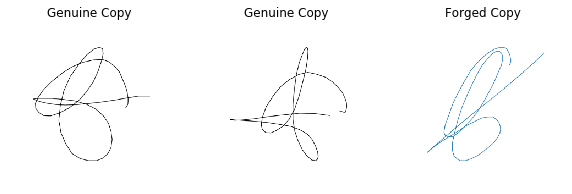

In [107]:
visualize_sample_signature()

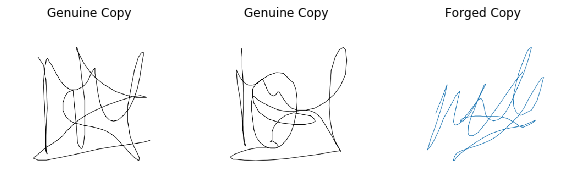

In [108]:
visualize_sample_signature()

In [109]:
img_h, img_w = 64, 128

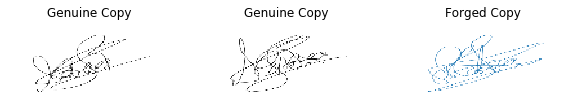

In [110]:
visualize_sample_signature()

In [111]:
img_h, img_w = 300, 300

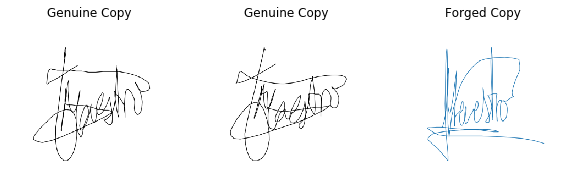

In [112]:
visualize_sample_signature()

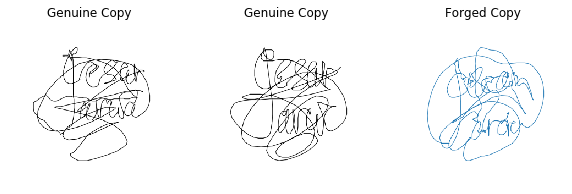

In [113]:
visualize_sample_signature()

In [172]:
def generate_batch(orig_groups, forg_groups, batch_size = 32):
    '''Function to generate a batch of data with batch_size number of data points
    Half of the data points will be Genuine-Genuine pairs and half will be Genuine-Forged pairs'''
    while True:
        orig_pairs = []
        forg_pairs = []
        gen_gen_labels = []
        gen_for_labels = []
        all_pairs = []
        all_labels = []
        
        # Here we create pairs of Genuine-Genuine image names and Genuine-Forged image names
        # For every person we have 25 genuine signatures, hence we have 
        # 25 choose 2 = 300 Genuine-Genuine image pairs for one person.
        # To make Genuine-Forged pairs, we pair every Genuine signature of a person
        # with 12 randomly sampled Forged signatures of the same person.
        # Thus we make 25 * 12 = 300 Genuine-Forged image pairs for one person.
        # In all we have 100 person's data in the training data.
        # Total no. of Genuine-Genuine pairs = 100 * 300 = 30000
        # Total number of Genuine-Forged pairs = 100 * 300 = 30000
        # Total no. of data points = 30000 + 30000 = 60000
        for orig, forg in zip(orig_groups, forg_groups):
            orig_pairs.extend(list(itertools.combinations(orig, 2)))
            for i in range(len(forg)):
                forg_pairs.extend(list(itertools.product(orig[i:i+1], random.sample(forg, 12))))
        
        # Label for Genuine-Genuine pairs is 1
        # Label for Genuine-Forged pairs is 0
        gen_gen_labels = [1]*len(orig_pairs)
        gen_for_labels = [0]*len(forg_pairs)
        
        # Concatenate all the pairs together along with their labels and shuffle them
        all_pairs = orig_pairs + forg_pairs
        all_labels = gen_gen_labels + gen_for_labels
        del orig_pairs, forg_pairs, gen_gen_labels, gen_for_labels
        all_pairs, all_labels = shuffle(all_pairs, all_labels)
        
        # Note the lists above contain only the image names and
        # actual images are loaded and yielded below in batches
        # Below we prepare a batch of data points and yield the batch
        # In each batch we load "batch_size" number of image pairs
        # These images are then removed from the original set so that
        # they are not added again in the next batch.
        
        img_h, img_w = 64, 128
        k = 0
        pairs=[np.zeros((batch_size, 64, 128, 3)) for i in range(2)]
        targets=np.zeros((batch_size,))
        for ix, pair in enumerate(all_pairs):
            img1 = cv2.imread(pair[0], 0)
            img2 = cv2.imread(pair[1], 0)
            img1 = cv2.resize(img1, (img_w, img_h))
            img2 = cv2.resize(img2, (img_w, img_h))
            img1 = np.array(img1, dtype = np.float64)
            img2 = np.array(img2, dtype = np.float64)
            img1 /= 255
            img2 /= 255
            img1 = img1[..., np.newaxis]
            img2 = img2[..., np.newaxis]
            pairs[0][k, :, :, :] = img1
            pairs[1][k, :, :, :] = img2
            targets[k] = all_labels[ix]
            k += 1
            if k == batch_size:
                yield pairs, targets
                k = 0
                pairs=[np.zeros((batch_size, img_h, img_w, 3)) for i in range(2)]
                targets=np.zeros((batch_size,))

In [115]:
def euclidean_distance(vects):
    '''Compute Euclidean Distance between two vectors'''
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

In [116]:
def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [150]:
#Creating Base Shallow Network

def base_shallow_signet(input_shape):
    
    #intantiate model 
    model = Sequential()
    
    #Convolution layer 1 with relu activation followed by Maxpooling
    model.add(Conv2D(40, (7, 7), activation='relu', init='random_normal',input_shape=input_shape, strides=1))
    model.add(MaxPooling2D((2, 2),strides=2))
    
    #Convolution layer 2 with relu activation followed by Maxpooling
    model.add(Conv2D(30, (5, 5), activation='relu', init='random_normal',strides =1))
    model.add(MaxPooling2D((3, 3),strides=3))
    
    #Convolution layer 3 with relu activation followed by Maxpooling
    model.add(Conv2D(20, (3, 3), activation='relu', init='random_normal',strides =1))
    model.add(MaxPooling2D((3, 3),strides=3))
    
    #passing it to one fully connected layer
    model.add(Flatten())
    model.add(Dense(200, activation='relu', init='random_normal'))
    
    #Dropout to prevent overfitting
    model.add(Dropout(0.5))
    
    #100 users so 100 classes with softmax activation
    model.add(Dense(100, activation='softmax'))
    
    return model
    
    

In [151]:
#input shape
input_shape=(64, 128, 3)

In [152]:
#Creating proposed CNN
base_network = base_shallow_signet(input_shape)



C:\Users\Anshul\.conda\envs\env1\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(40, (7, 7), activation="relu", input_shape=(64, 128, ..., strides=1, kernel_initializer="random_normal")`
  if __name__ == '__main__':
C:\Users\Anshul\.conda\envs\env1\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(30, (5, 5), activation="relu", strides=1, kernel_initializer="random_normal")`
  del sys.path[0]
C:\Users\Anshul\.conda\envs\env1\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, (3, 3), activation="relu", strides=1, kernel_initializer="random_normal")`
C:\Users\Anshul\.conda\envs\env1\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, activation="relu", kernel_initializer="random_normal")`


In [160]:
#Network Defination

input_shape=(64, 128, 3)
input_a = Input(shape=(input_shape))
input_b = Input(shape=(input_shape))

print(input_a, input_b)

Tensor("input_31:0", shape=(None, 64, 128, 3), dtype=float32) Tensor("input_32:0", shape=(None, 64, 128, 3), dtype=float32)


In [161]:
# because we re-use the same instance `base_network`,
# the weights of the network
# will be shared across the two branches
processed_a = base_network(input_a)


In [162]:
processed_b = base_network(input_b)

# Compute the Euclidean distance between the two vectors in the latent space
distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([processed_a, processed_b])

model = Model(input=[input_a, input_b], output=distance)

C:\Users\Anshul\.conda\envs\env1\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("la...)`
  


In [187]:
#Compiling model using SGD optimizer with momentum 0.9 and cross entropy loss function

import keras

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9))

In [164]:
#Summary of the network
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_31 (InputLayer)           (None, 64, 128, 3)   0                                            
__________________________________________________________________________________________________
input_32 (InputLayer)           (None, 64, 128, 3)   0                                            
__________________________________________________________________________________________________
sequential_14 (Sequential)      (None, 100)          101670      input_31[0][0]                   
                                                                 input_32[0][0]                   
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 1)            0           sequential_14[1][0]        

In [176]:
# Using Keras Callbacks, save the model after every epoch
# Reduce the learning rate by a factor of 0.1 if the validation loss does not improve for 5 epochs
# Stop the training using early stopping if the validation loss does not improve for 12 epochs
callbacks = [
    EarlyStopping(patience=12, verbose=1),
    tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.000001, verbose=1),
    ModelCheckpoint('./Weights_MYCT_100/cnn_signet_myct_100{epoch:03d}.h5', verbose=1, save_weights_only=True)
]

In [177]:
batch_sz = 128

#ratio of [2:8] tranning to testing as per paper
#for 64 user 300 genuine-genuine and 300 genuine-forged pairs
num_train_samples = 300 * 64 + 300 * 64

#for validation and testing respectivly 16 and 20 people
num_val_samples =  300 * 16 + 300 * 16
num_test_samples = 300 * 20 + 200 * 20 
num_train_samples, num_val_samples, num_test_samples

(38400, 9600, 10000)

In [188]:
results = model.fit_generator(generate_batch(orig_train, forg_train, batch_sz),
                              steps_per_epoch = num_train_samples//batch_sz,
                              epochs = 15,
                              validation_data = generate_batch(orig_val, forg_val, batch_sz),
                              validation_steps = num_val_samples//batch_sz,
                              callbacks = callbacks)

Epoch 1/15
300/300 [==============================] - 2900s 10s/step - loss: 5.9512e-08 - val_loss: 6.1467e-08

Epoch 00001: saving model to ./Weights_MYCT_100/cnn_signet_myct_100001.h5
Epoch 2/15
300/300 [==============================] - 2066s 7s/step - loss: 5.9508e-08 - val_loss: 5.9605e-08

Epoch 00002: saving model to ./Weights_MYCT_100/cnn_signet_myct_100002.h5
Epoch 3/15
300/300 [==============================] - 2190s 7s/step - loss: 5.9477e-08 - val_loss: 6.4261e-08

Epoch 00003: saving model to ./Weights_MYCT_100/cnn_signet_myct_100003.h5
Epoch 4/15
300/300 [==============================] - 2078s 7s/step - loss: 5.9490e-08 - val_loss: 5.8673e-08

Epoch 00004: saving model to ./Weights_MYCT_100/cnn_signet_myct_100004.h5
Epoch 5/15
300/300 [==============================] - 2034s 7s/step - loss: 5.9505e-08 - val_loss: 6.1467e-08

Epoch 00005: saving model to ./Weights_MYCT_100/cnn_signet_myct_100005.h5
Epoch 6/15
300/300 [==============================] - 2055s 7s/step - loss

KeyboardInterrupt: 

In [189]:
# After observing continuous fall in validation accuracy, I interrupted the training manually

In [190]:
def compute_accuracy_roc(predictions, labels):
    '''Compute ROC accuracy with a range of thresholds on distances.
    '''
    dmax = np.max(predictions)
    dmin = np.min(predictions)
    nsame = np.sum(labels == 1)
    ndiff = np.sum(labels == 0)
   
    step = 0.01
    max_acc = 0
    best_thresh = -1
   
    for d in np.arange(dmin, dmax+step, step):
        idx1 = predictions.ravel() <= d
        idx2 = predictions.ravel() > d
       
        tpr = float(np.sum(labels[idx1] == 1)) / nsame       
        tnr = float(np.sum(labels[idx2] == 0)) / ndiff
        acc = 0.5 * (tpr + tnr)       
#       print ('ROC', acc, tpr, tnr)
       
        if (acc > max_acc):
            max_acc, best_thresh = acc, d
           
    return max_acc, best_thresh

In [215]:
# Load the weights from the epoch which gave the best validation accuracy


def load_and_check_model(weight):
    model.load_weights(weight)

    val_gen = generate_batch(orig_val, forg_val, 1)
    pred, tr_y = [], []
    for i in range(5):
        (img1, img2), label = next(val_gen)
        tr_y.append(label)
        pred.append(model.predict([img1, img2])[0][0])

    tr_acc, threshold = compute_accuracy_roc(np.array(pred), np.array(tr_y))
    return tr_acc, threshold


acc_thresh = []
for i in range(1,7,1):
    acc_thresh.append(load_and_check_model('./Weights_MYCT_100/cnn_signet_myct_10000'+str(i)+'.h5'))
    print('For model '+str(i)+' Validation Accuracy = ',acc_thresh[i-1][0]*100,'%')

For model 1 Validation Accuracy =  75.0 %
For model 2 Validation Accuracy =  75.0 %
For model 3 Validation Accuracy =  75.0 %
For model 4 Validation Accuracy =  66.66666666666666 %
For model 5 Validation Accuracy =  62.5 %
For model 6 Validation Accuracy =  50.0 %


In [218]:
os.getcwd()
os.chdir('C:\\Users\\Anshul\\OneDrive\\Desktop\\datasets\\Weights_MYCT_100')

In [219]:
os.getcwd()

'C:\\Users\\Anshul\\OneDrive\\Desktop\\datasets\\Weights_MYCT_100'

In [220]:
model.load_weights('cnn_signet_myct_100003.h5')

In [232]:
#Testig the data
img_w = 128
img_h = 64
num_test_samples

10000

In [243]:
os.chdir('C:\\Users\\Anshul\\OneDrive\\Desktop\\datasets\\')
#make sure that you are in right directory

In [244]:
test_gen = generate_batch(orig_test, forg_test, 1)
pred, tr_y = [], []
for i in range(num_test_samples):
    (img1, img2), label = next(test_gen)
    tr_y.append(label)
    pred.append(model.predict([img1, img2])[0][0])

In [251]:
tr_acc, threshold = compute_accuracy_roc(np.array(pred), np.array(tr_y))
tr_acc, threshold

(0.500099700897308, 0.0005129969213157892)

In [252]:
def predict_score():
    '''Predict distance score and classify test images as Genuine or Forged'''
    test_point, test_label = next(test_gen)
    img1, img2 = test_point[0], test_point[1]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
    ax1.imshow(np.squeeze(img1), cmap='gray')
    ax2.imshow(np.squeeze(img2), cmap='gray')
    ax1.set_title('Genuine')
    if test_label == 1:
        ax2.set_title('Genuine')
    else:
        ax2.set_title('Forged')
    ax1.axis('off')
    ax2.axis('off')
    plt.show()
    result = model.predict([img1, img2])
    diff = result[0][0]
    print("Difference Score = ", diff)
    if diff > threshold:
        print("Its a Forged Signature")
    else:
        print("Its a Genuine Signature")

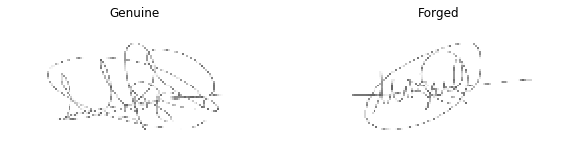

Difference Score =  0.0014626546
Its a Forged Signature


In [253]:
predict_score()